# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

I'm going to be looking at a sample of client data and analyzing it from month to month in order to see which prepaid plan brings in more revenue on average. We will begin by loading the data and then taking a preliminary look to clean and enhance the data.

Then we will aggregate the data by month in order to look at average statistics by graphing the data in a variety of ways.

Once we've looked at some descriptive statistics we will test a few hypotheses about our data to determine which plan brings in more revenue.

## Initialization

Loading all necessary libraries:

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from math import factorial
import numpy as np

## Load data

Create DataFrames from the files:

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('megaline_calls.csv')
internet = pd.read_csv('megaline_internet.csv')
messages = pd.read_csv('megaline_messages.csv')
plans = pd.read_csv('megaline_plans.csv')
users = pd.read_csv('megaline_users.csv')

# Prepare the data

We will now look at each table individually to assess them for missing or duplicate information, then amend them to enhance further processing, including adding month data.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Print a sample of data for plans

plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The plans table has no missing or duplicate values. `mb_per_month_included` will be converted to GB when calculating revenue.

### Fix data

Plans table has no errors

### Enrich data

Plans table does not need to be enriched.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()
users['user_id'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

In [6]:
# Print a sample of data for users
display(users['user_id'].duplicated().sum())
users.sample(5, random_state = 45)

0

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
204,1204,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaN
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaN
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19


Dates will be converted to datetime and the month will be extracted. There are no duplicates and churn date is the only column missing values, which we do not need to fill with any default value.

### Fix Data

Converting `reg_date` and `churn_date` to the datetime data type.

In [7]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enrich Data

Extracting month data.

In [8]:
users['reg_month'] = users['reg_date'].dt.month
users['churn_month'] = users['churn_date'].dt.month
users.sample(5, random_state = 45)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,churn_month
204,1204,Sherly,Levy,44,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-08-20,ultimate,NaT,8,NaN
481,1481,Roni,Frye,32,"Urban Honolulu, HI MSA",2018-12-27,surf,NaT,12,NaN
296,1296,Weston,Conley,36,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-10-20,ultimate,2018-12-18,10,12.0
38,1038,Olympia,Velazquez,32,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-06-25,ultimate,NaT,6,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19,9,12.0


## Calls

In [9]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Print a sample of data for calls
print(calls['id'].duplicated().sum())
calls.sample(5, random_state = 43)

0


,id,user_id,call_date,duration
68147,1246_166,1246,2018-04-26,6.27
69009,1247_342,1247,2018-07-31,7.51
103295,1365_491,1365,2018-10-16,6.02
12200,1053_455,1053,2018-09-16,6.01
110152,1389_181,1389,2018-09-12,8.77


No data seems to be missing or duplicated, `call_date` will need to be converted to datetime and we'll extract the month. Duration is calculated in minutes, and will be rounded up as per company policy.

### Fix data

Converting `call_date` to the datetime data type.

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

Adding month data for further processing. Duration will also be rounded up as per company policy.

In [12]:
calls['call_month'] = calls['call_date'].dt.month
# Rounding up to full minutes as per the policy
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.sample(5, random_state = 43)

,id,user_id,call_date,duration,call_month
68147,1246_166,1246,2018-04-26,7,4
69009,1247_342,1247,2018-07-31,8,7
103295,1365_491,1365,2018-10-16,7,10
12200,1053_455,1053,2018-09-16,7,9
110152,1389_181,1389,2018-09-12,9,9


## Messages

In [13]:
# Print the general/summary information about the messages' DataFrame
messages.info()
messages['id'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [14]:
# Print a sample of data for messages
messages.sample(5, random_state = 10)


,id,user_id,message_date
20849,1131_188,1131,2018-05-15
60552,1382_88,1382,2018-12-12
60678,1382_317,1382,2018-11-09
15362,1101_419,1101,2018-08-22
2388,1028_300,1028,2018-05-27


No missing or duplicated values. We will extract the month from the `message_date` column as before.

### Fix data

Converting `message_date` to datetime.

In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

Extracting month data for analysis.

In [16]:
messages['message_month'] = messages['message_date'].dt.month
messages.sample(5, random_state = 10)

,id,user_id,message_date,message_month
20849,1131_188,1131,2018-05-15,5
60552,1382_88,1382,2018-12-12,12
60678,1382_317,1382,2018-11-09,11
15362,1101_419,1101,2018-08-22,8
2388,1028_300,1028,2018-05-27,5


## Internet

In [17]:
# Print the general/summary information about the internet DataFrame
internet.info()
internet['id'].duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [18]:
# Print a sample of data for the internet traffic

internet.sample(10, random_state=55)

,id,user_id,session_date,mb_used
48900,1219_10,1219,2018-12-13,181.08
63483,1292_187,1292,2018-08-30,887.05
20949,1097_187,1097,2018-11-09,0.00
37136,1167_59,1167,2018-06-11,480.58
62239,1284_65,1284,2018-10-31,779.36
69898,1327_38,1327,2018-11-15,455.66
33735,1153_267,1153,2018-08-04,0.00
37099,1167_22,1167,2018-10-16,518.50
67240,1312_463,1312,2018-03-10,0.00
83555,1390_110,1390,2018-12-12,54.11


No missing or duplicate values. `session_date` will be converted to datetime and month will be extracted. `mb_used` will be converted to GB later in the project.

### Fix data

Converting `session_date` to datetime.

In [19]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

Extracting month data for analysis.

In [20]:
internet['session_month'] = internet['session_date'].dt.month
internet.head(10)

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


## Study plan conditions

Restating plan conditions to remind us of the neccesary data.

In [21]:
# Print out the plan conditions and make sure they are clear for you

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Aggregate data per user

Now that we've cleaned and preped the data, we will aggregate it into user and billing period to assist in further analysis.

In [22]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_month = calls.groupby(['user_id', 'call_month'])['id'].count().reset_index()
calls_per_month.rename(columns={'call_month':'month', 'id':'calls'}, inplace=True)
calls_per_month

,user_id,month,calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [23]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_per_month = calls.groupby(['user_id', 'call_month'])['duration'].sum().reset_index()
minutes_per_month.rename(columns={'call_month':'month', 'duration': 'total_minutes'}, inplace=True)
minutes_per_month

,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [24]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_month = messages.groupby(['user_id', 'message_month'])['id'].count().reset_index()
messages_per_month.rename(columns={'message_month':'month', 'id':'messages'}, inplace=True)
messages_per_month

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_month = internet.groupby(['user_id', 'session_month'])['mb_used'].sum().reset_index()
internet_per_month.rename(columns={'session_month':'month'}, inplace=True)
internet_per_month

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


We will now take all the user data separated by month and combine it. Then we combine user data with plan data to make calculations easier.

In [26]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
useage_per_month = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month'], how='outer')
useage_per_month = pd.merge(useage_per_month, messages_per_month, on=['user_id', 'month'], how='outer')
useage_per_month = pd.merge(useage_per_month, internet_per_month, on=['user_id', 'month'], how='outer')
useage_per_month.head()

,user_id,month,calls,total_minutes,messages,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30


In [27]:
# Add the plan information
useage_per_month = pd.merge(useage_per_month, users[['user_id', 'plan']], on='user_id', how='left')
# Combine User and plan data
user_plans = pd.merge(users, plans, left_on='plan', right_on='plan_name', how='left')
# Add the plan data to the aggregated table
useage_per_month_plan = pd.merge(useage_per_month, user_plans[['user_id', 'plan', 'minutes_included', 'messages_included', 'mb_per_month_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], on='user_id', how='left')
useage_per_month_plan.sample(5, random_state=34)

,user_id,month,calls,total_minutes,messages,mb_used,plan_x,plan_y,minutes_included,messages_included,mb_per_month_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
1713,1367,11,20.0,105.0,NaN,17176.25,surf,surf,500,50,15360,20,10,0.03,0.03
763,1159,10,110.0,848.0,106.0,15861.99,ultimate,ultimate,3000,1000,30720,70,7,0.01,0.01
2094,1454,9,30.0,200.0,85.0,23703.57,ultimate,ultimate,3000,1000,30720,70,7,0.01,0.01
2266,1494,11,82.0,509.0,35.0,18405.82,surf,surf,500,50,15360,20,10,0.03,0.03
1553,1336,8,90.0,584.0,74.0,14404.64,surf,surf,500,50,15360,20,10,0.03,0.03


We will now design a function that will take the aggregated data and compare it to the plan data to calculate the monthly revenue per user. We then split that table into the two plans in order to make comparisons.

In [28]:
# Calculate the monthly revenue for each user
def calculate_monthly_revenue(row):
    charge = row['usd_monthly_pay']
    if row['total_minutes'] > row['minutes_included']:
        charge += (row['total_minutes']-row['minutes_included'])*row['usd_per_minute']
    if row['messages'] > row['messages_included']:
        charge += (row['messages']-row['messages_included'])*row['usd_per_message']
    if row['mb_used'] > row['mb_per_month_included']:
        # Converting extra MB to GB and calculating the charge
        extra_gb = np.ceil((row['mb_used'] - row['mb_per_month_included']) / 1024)
        charge += extra_gb * row['usd_per_gb']
    return charge
useage_per_month['monthly_revenue'] = useage_per_month_plan.apply(calculate_monthly_revenue, axis=1)
useage_per_month = useage_per_month.sort_values(['user_id', 'month']).reset_index(drop=True)
surf = useage_per_month[useage_per_month['plan'] == 'surf']
ultimate = useage_per_month[useage_per_month['plan'] == 'ultimate']
display(useage_per_month)

,user_id,month,calls,total_minutes,messages,mb_used,plan,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,ultimate,70.00
1,1001,8,27.0,182.0,30.0,6919.15,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,surf,90.09
4,1001,11,64.0,426.0,36.0,18504.30,surf,60.00
...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,23137.69,surf,100.00
2289,1499,9,41.0,346.0,NaN,12984.76,surf,20.00
2290,1499,10,53.0,385.0,NaN,19492.43,surf,70.00
2291,1499,11,45.0,308.0,NaN,16813.83,surf,40.00


## Study user behaviour

We will now take our aggregated table and use it to calculate a few descriptive statistics about the two plans, and compare them against each other.

### Calls

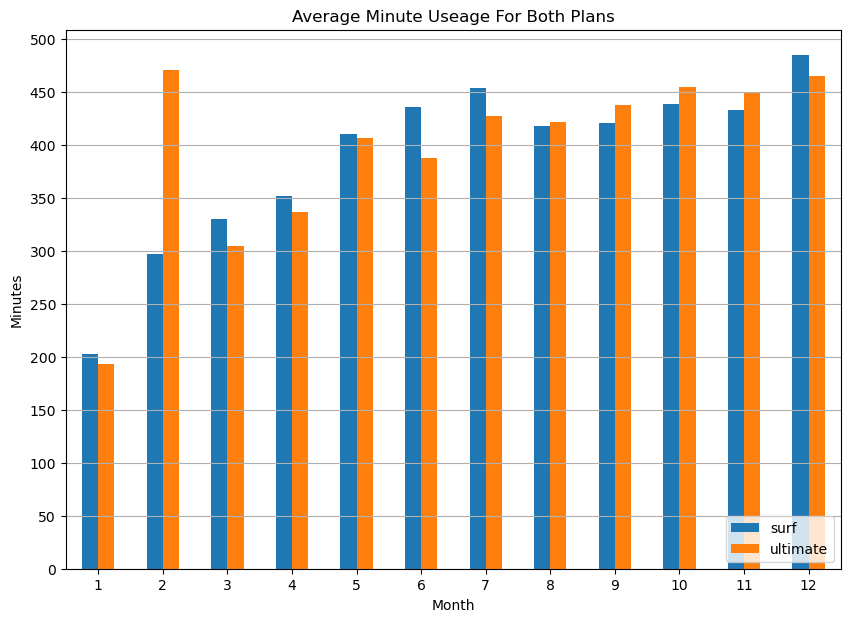

In [29]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
calls_per_plan = useage_per_month.pivot_table(columns='plan', index='month', values='total_minutes', aggfunc='mean')
calls_per_plan.plot.bar(xlabel='Month',
                        ylabel='Minutes',
                        title='Average Minute Useage For Both Plans',
                        rot=0,
                        figsize=(10, 7))
plt.legend(loc='lower right')
plt.grid(axis = 'y')
plt.yticks(np.arange(0, 550, step = 50))
plt.show()

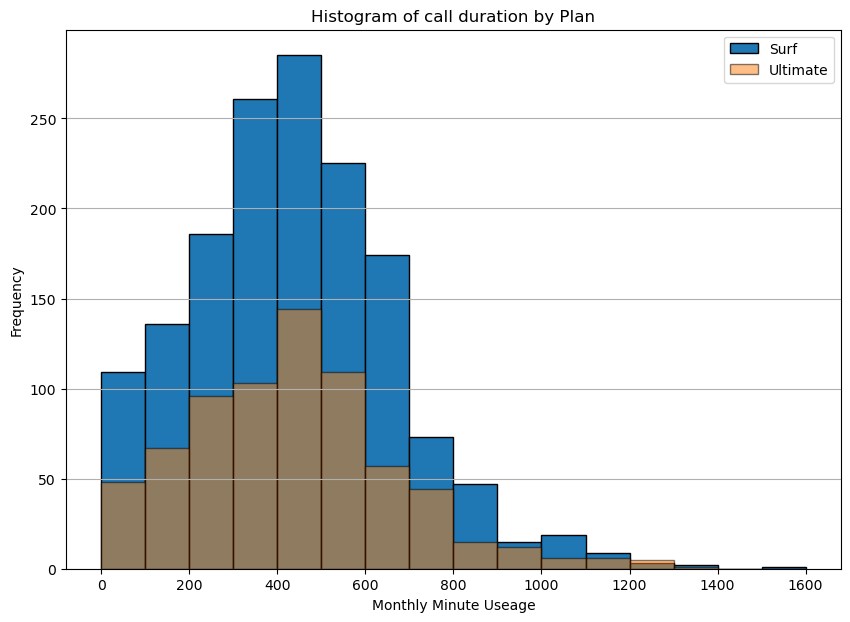

In [30]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
minute_bins = np.arange(0, 1700, step = 100) 
surf['total_minutes'].plot.hist(bins=minute_bins,
                                title='Histogram of call duration by Plan',
                                figsize=(10,7),
                                edgecolor='black')
ultimate['total_minutes'].plot.hist(bins=minute_bins,
                                    edgecolor='black',
                                    alpha=0.5)
plt.grid(axis = 'y')
plt.xlabel('Monthly Minute Useage')
plt.legend(['Surf', 'Ultimate'])
plt.show()

In [31]:
# Calculate the mean and the variance of the monthly call duration
surf_mean = surf['total_minutes'].mean()
surf_std = np.std(surf['total_minutes'])
ultimate_mean = ultimate['total_minutes'].mean()
ultimate_std = np.std(ultimate['total_minutes'])
print(f'''Surf Plan Mean: {surf_mean}
Surf Plan Standard Deviation: {surf_std}
Ultimate Plan Mean: {ultimate_mean}
Ultimate Plan Standard Deviation: {ultimate_std}''')

Surf Plan Mean: 436.51974110032364
Surf Plan Standard Deviation: 229.20959112852367
Ultimate Plan Mean: 434.67601683029454
Ultimate Plan Standard Deviation: 237.68526740051348


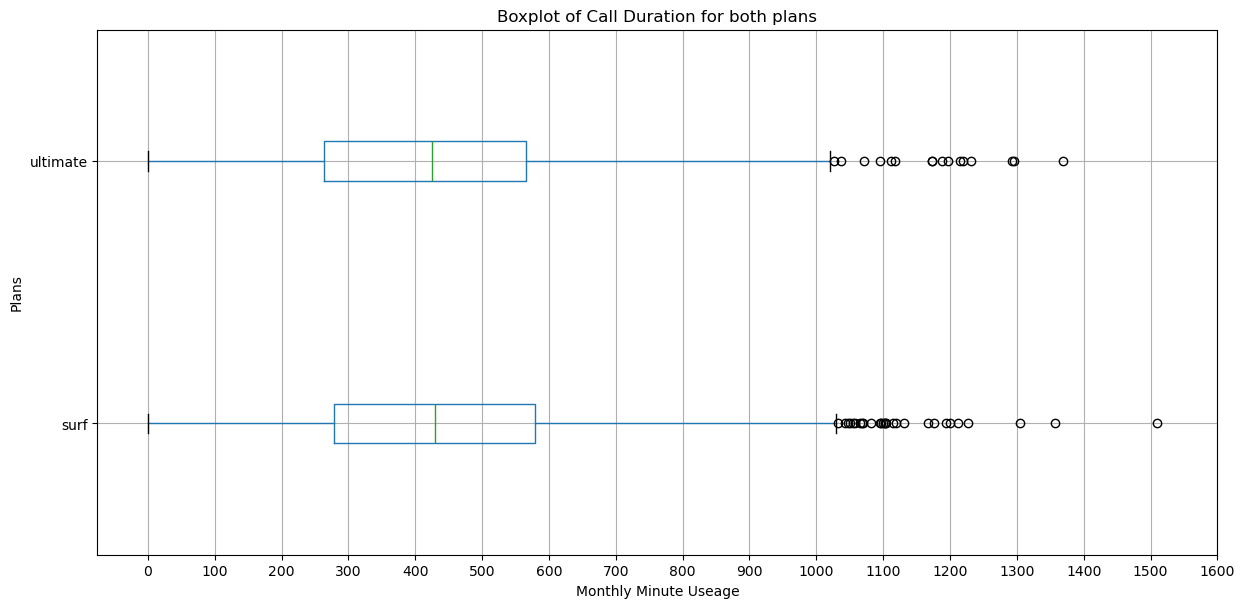

In [32]:
# Plot a boxplot to visualize the distribution of the monthly call duration
useage_per_month.boxplot(column='total_minutes',
                         by='plan',
                         figsize=(14,7),
                         vert=False)
plt.title('Boxplot of Call Duration for both plans')
plt.suptitle('')
plt.ylabel('Plans')
plt.xlabel('Monthly Minute Useage')
plt.xticks(minute_bins)
plt.show()

While users with the surf plan tend to spend more per month on average, the two plans have very similar distributions for minute useage. 

Both plans have a very similar mean, median and standard deviation. Both plans also have a positive skew with many outliers outside of the 1000 minute range.

### Messages

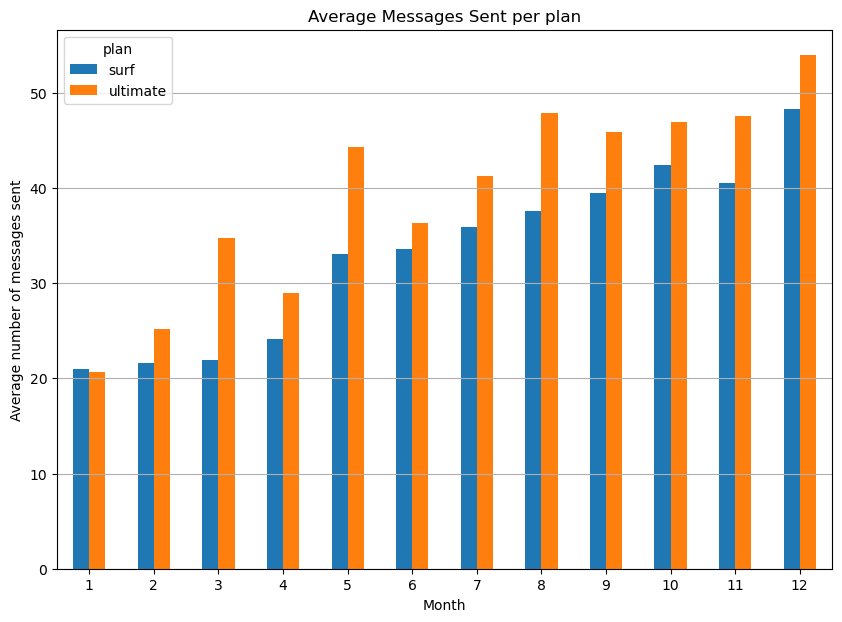

In [33]:
# Compare the average number of messages users of each plan tend to send each month
messages_per_plan = useage_per_month.pivot_table(columns='plan', index='month', values='messages', aggfunc='mean')
messages_per_plan.plot.bar(xlabel='Month',
                           ylabel='Average number of messages sent',
                           title='Average Messages Sent per plan',
                           rot=0,
                           figsize=(10, 7))
plt.grid(axis = 'y')
plt.show()

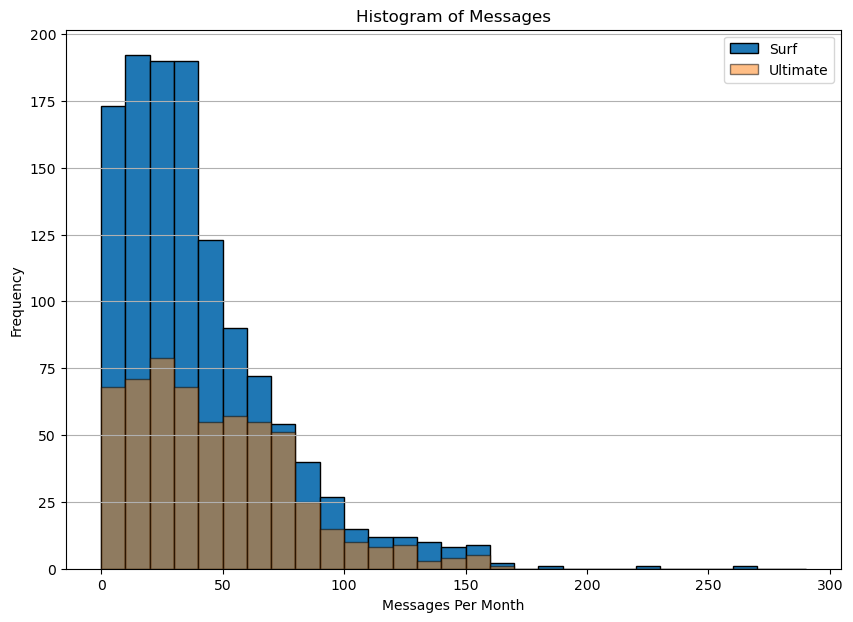

In [34]:
# Compare the number of messages users of each plan require each month.
message_bins = np.arange(0, 300, step = 10)
surf['messages'].plot.hist(bins=message_bins,
                           edgecolor='black',
                           figsize= (10, 7))
ultimate['messages'].plot.hist(bins= message_bins,
                               edgecolor='black',
                               alpha=0.5)
plt.grid(axis = 'y')
plt.xlabel('Messages Per Month')
plt.legend(['Surf', 'Ultimate'])
plt.title('Histogram of Messages')
plt.show()

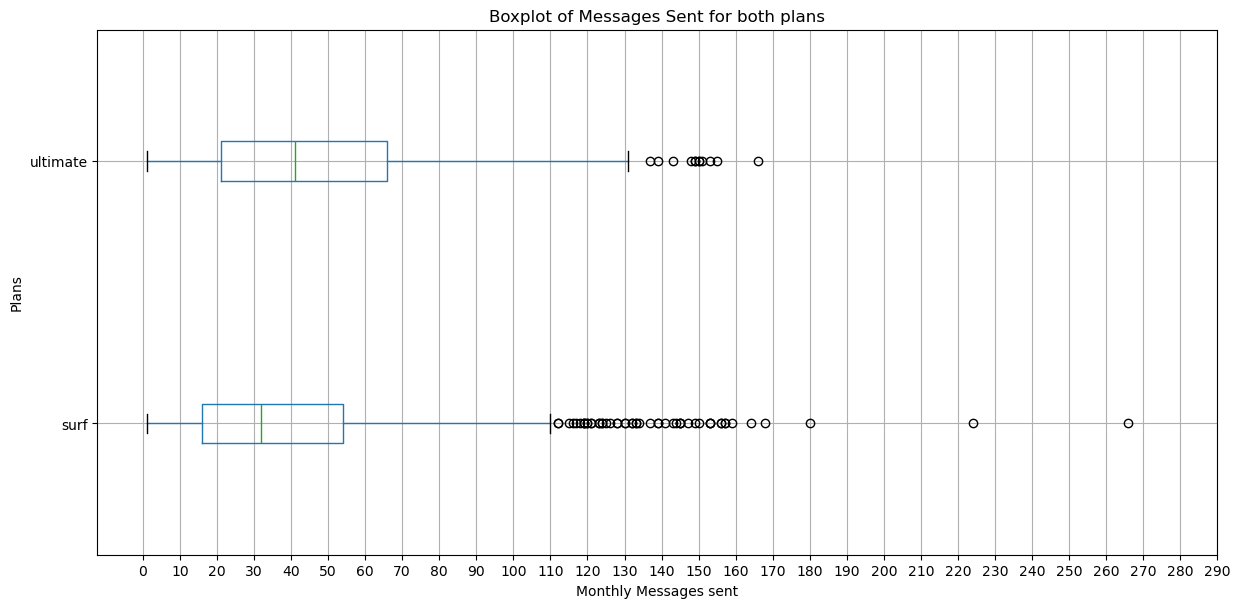

In [35]:
useage_per_month.boxplot(column='messages',
                         by='plan',
                         figsize=(14, 7),
                         vert=False)
plt.title('Boxplot of Messages Sent for both plans')
plt.suptitle('')
plt.ylabel('Plans')
plt.xlabel('Monthly Messages sent')
plt.xticks(message_bins)
plt.show()

On average users of the ultimate plan send more messages per month than their surf plan counter parts. However none of the ultimate users go over their alloted limit of 1000 messages, or even come close to that limit at all, whereas more than 25% of surf users go over their limit of 50, with outliers over 200 messages.

### Internet

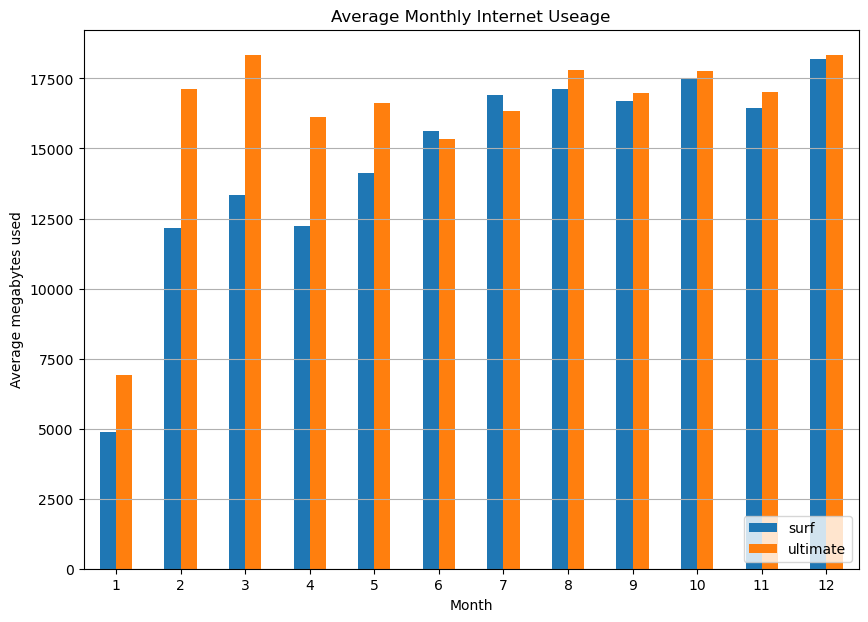

In [36]:
# Compare the amount of internet traffic consumed by users per plan
internet_per_plan = useage_per_month.pivot_table(columns='plan', index='month', values='mb_used', aggfunc='mean')
internet_per_plan.plot.bar(xlabel='Month',
                           ylabel='Average megabytes used', 
                           title='Average Monthly Internet Useage',
                           rot=0,
                           figsize=(10, 7))
plt.legend(loc='lower right')
plt.grid(axis = 'y')
plt.show()

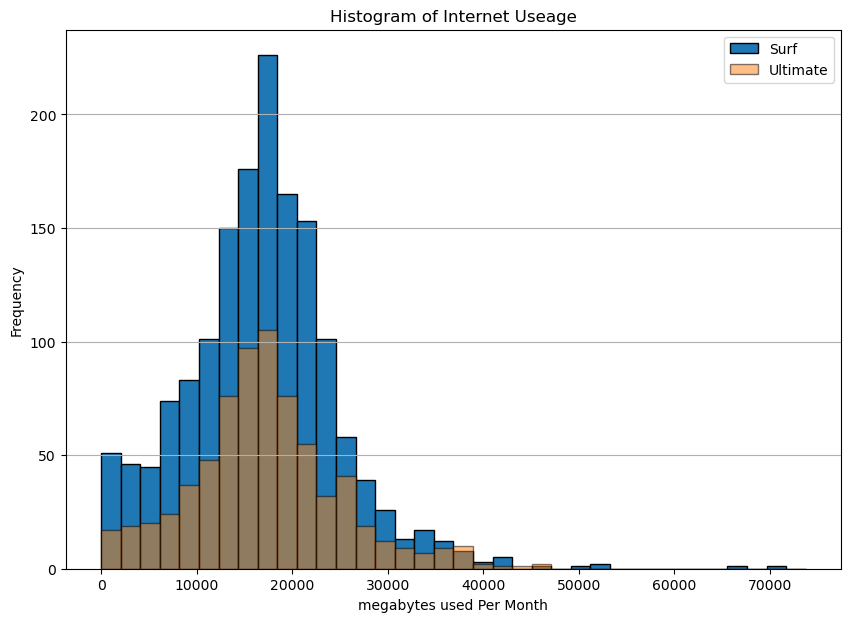

In [37]:
# Compare the internet users of each plan require each month.
internet_bins = np.arange(0, 75776, step = 2048)
surf['mb_used'].plot.hist(bins=internet_bins,
                          edgecolor='black',
                          figsize= (10, 7))
ultimate['mb_used'].plot.hist(bins= internet_bins,
                              edgecolor='black',
                              alpha=0.5)
plt.grid(axis = 'y')
plt.xlabel('megabytes used Per Month')
plt.legend(['Surf', 'Ultimate'])
plt.title('Histogram of Internet Useage')
plt.show()

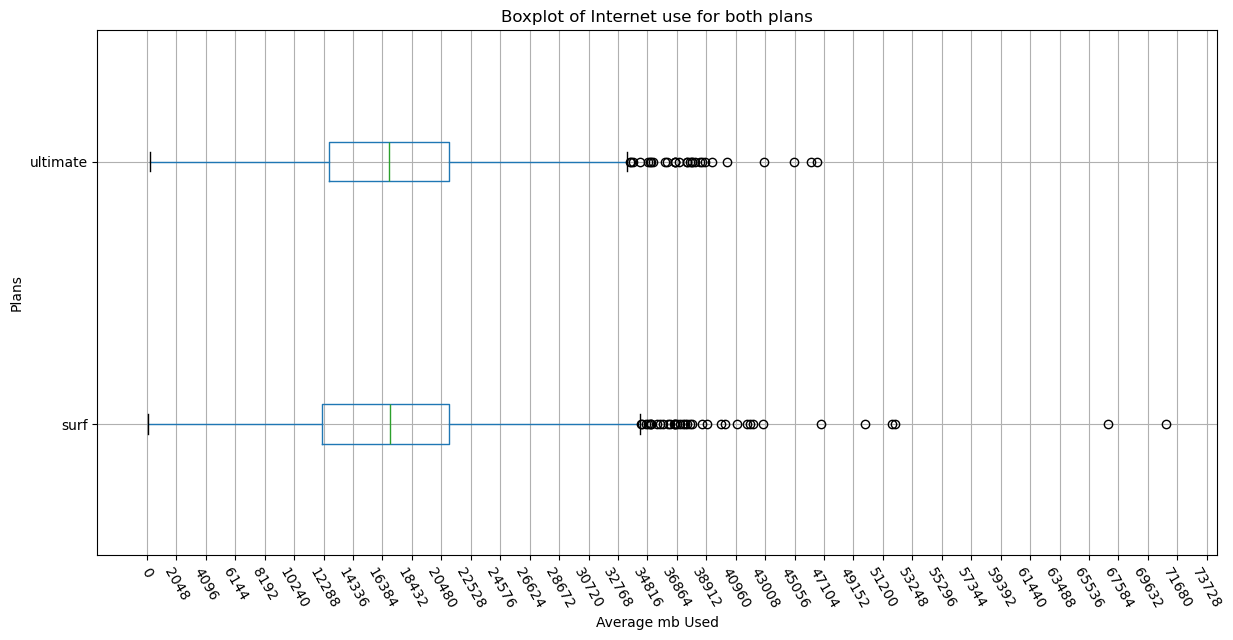

In [38]:
useage_per_month.boxplot(column='mb_used',
                         by='plan',
                         figsize=(14, 7),
                         vert=False)
plt.title('Boxplot of Internet use for both plans')
plt.suptitle('')
plt.ylabel('Plans')
plt.xlabel('Average mb Used')
plt.xticks(internet_bins, rotation=300)
plt.show()

Towards the beginning of the year, ultimate users use more data. Around June the average data useage evens out though ultimate users still tend to use slightly more.

That means that because both plans have similar distibutions the only users that go over their limit for the ultimate plan are outliers. Just over 50% of the surf users go over their alloted amount, leading to much more revenue.

## Revenue

Now that we've analysed the data useage between the two plans, we can take what we've learned and apply it to the `monthly_revenue` column and formulate our hypotheses. 

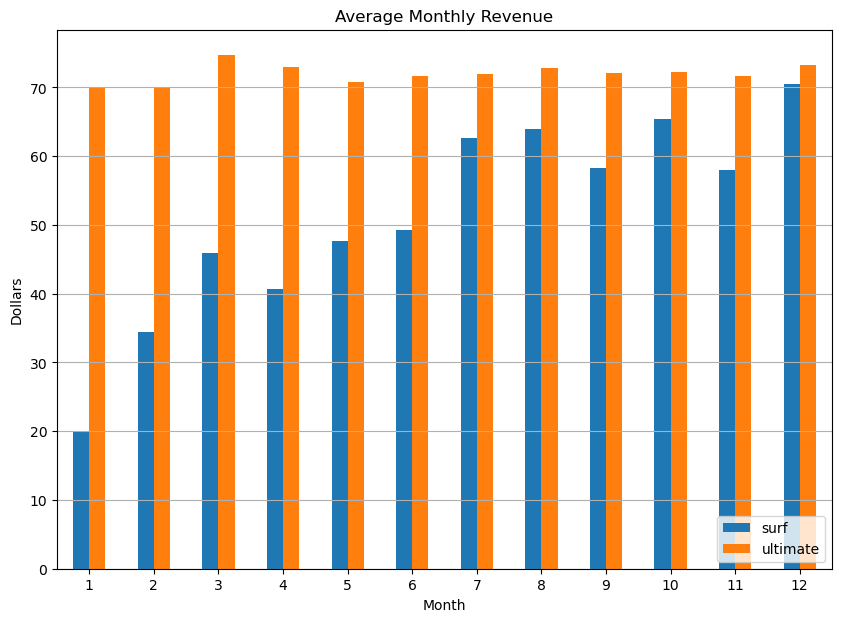

In [39]:
revenue_per_plan = useage_per_month.pivot_table(columns='plan', index='month', values='monthly_revenue', aggfunc='mean')
revenue_per_plan.plot.bar(xlabel='Month',
                          ylabel='Dollars',
                          title='Average Monthly Revenue',
                          rot=0,
                          figsize=(10, 7))
plt.legend(loc='lower right')
plt.grid(axis = 'y')
plt.show()

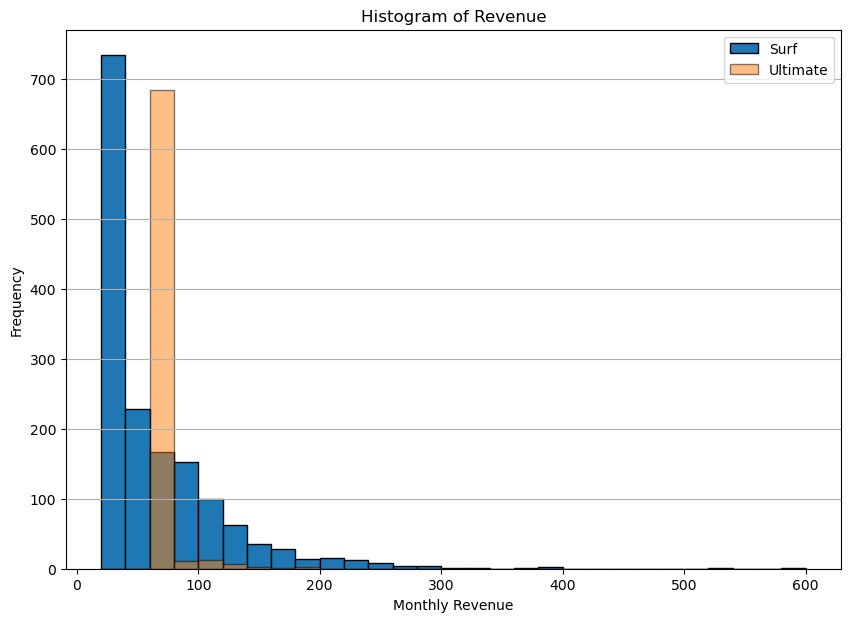

In [40]:
revenue_bins = np.arange(20, 620, step = 20)
surf['monthly_revenue'].plot.hist(bins=revenue_bins,
                                  edgecolor='black',
                                  figsize= (10, 7))
ultimate['monthly_revenue'].plot.hist(bins=revenue_bins,
                                      edgecolor='black',
                                      alpha=0.5)
plt.xlabel('Monthly Revenue')
plt.title('Histogram of Revenue')
plt.legend(['Surf', 'Ultimate'])
plt.grid(axis = 'y')
plt.show()

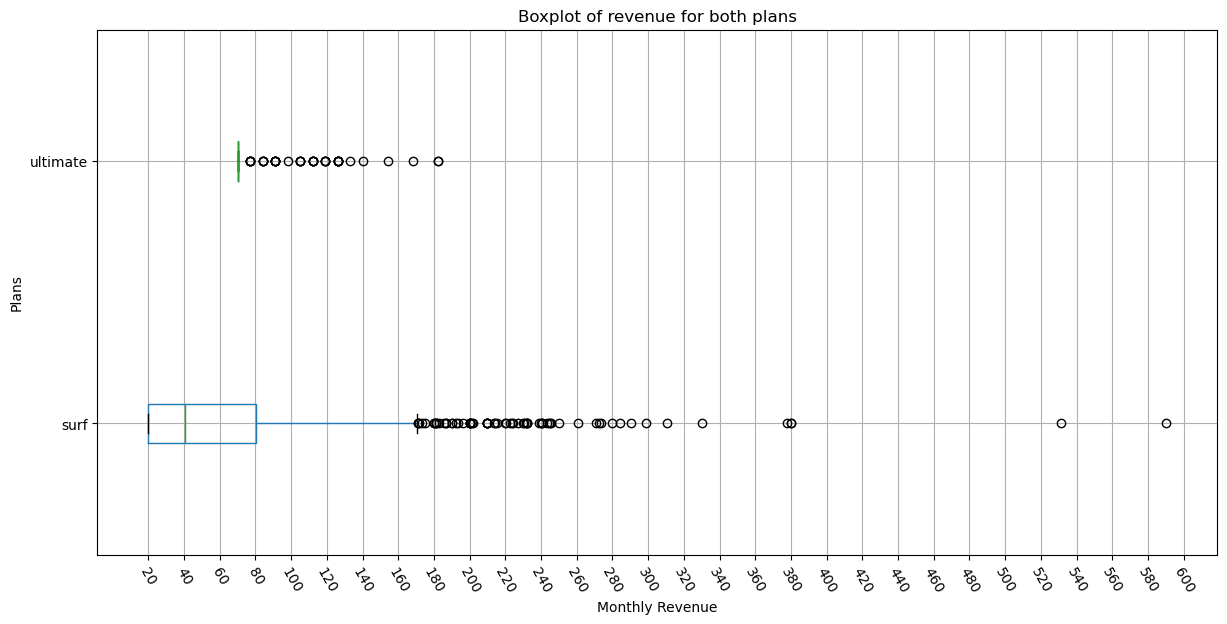

In [41]:
useage_per_month.boxplot(column='monthly_revenue',
                         by='plan',
                         figsize=(14, 7),
                         vert=False)
plt.title('Boxplot of revenue for both plans')
plt.suptitle('')
plt.ylabel('Plans')
plt.xlabel('Monthly Revenue')
plt.xticks(revenue_bins, rotation=300)
plt.show()

Due to the much higher monthly rate of the ultimate plan, users of that plan spend much more on average than users of the surf plan. 

However, because the ultimate plan has much higher data limits users tend to not use past their limits, where surf users have a much more positively skewed revenue distribution, having a few outliers on the surf plan to outpreform the entire ultimate plan user base.

# Test statistical hypotheses

We will now be testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

For this test we will be testing the two populations of users on each plan against each other. The significance level of the test will be 5%. 

H<sub>0</sub>: Surf Revenue Mean == Ultimate Revenue Mean

H<sub>1</sub>: Surf Revenue Mean != Ultimate Revenue Mean

In [42]:
# Test the hypotheses
surf_revenue = surf['monthly_revenue']
ultimate_revenue = ultimate['monthly_revenue']
alpha = 0.05
results = st.ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

display(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    display('We can reject the null hypothesis. There is sufficent evidence that the average revenue from users of the Surf and Ultimate plans differ.')
else:
    display('We cannot reject the null hypothesis. There is not sufficent evidence that the average revenue from users of the Surf and Ultimate plans differ.')

'p-value: 3.1703905481135738e-15'

'We can reject the null hypothesis. There is sufficent evidence that the average revenue from users of the Surf and Ultimate plans differ.'

Now we will test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

For this test we will be testing the two populations of users from the `NY-NJ` area and other regions against each other. The significance level of the test will still be 5%. 

H<sub>0</sub>: `NY-NJ` Revenue Mean == Other Regions Revenue Mean

H<sub>1</sub>: `NY-NJ` Revenue Mean != Other Regions Revenue Mean

In [43]:
# Test the hypotheses

# Add city data to our table
useage_per_month_city = pd.merge(useage_per_month, users[['user_id', 'city']], on='user_id', how='left')

# Separating our data by region
ny_nj_revenue = useage_per_month_city[useage_per_month_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']
other_regions_revenue = useage_per_month_city[~useage_per_month_city['city'].str.contains('NY-NJ', case=False)]['monthly_revenue']

# Testing the hypotheses 
results1 = st.ttest_ind(ny_nj_revenue, other_regions_revenue)
display(f'p-value: {results1.pvalue}')

if results1.pvalue < alpha:
    display('We can reject the null hypothesis. There is sufficent evidence that the average revenue from users of the NY-NJ area and other regions differ.')
else:
    display('We cannot reject the null hypothesis. There is not sufficent evidence that the average revenue from users of the NY-NJ area and other regions differ.')

'p-value: 0.043557431621342436'

'We can reject the null hypothesis. There is sufficent evidence that the average revenue from users of the NY-NJ area and other regions differ.'

## General conclusion

We've now looked at the monthly data distributions for users across both plans in various categories, and then looked at the same distributions for monthly revenue. We could see from the data useage distributions that users of both plans tend to have very similar data useage across all metrics, however ultimate users tend to be more conservative with exceeding their monthly limits, where a significant amount of surf users exceed limits with regularity.

From this we can deduce that while ultimate users have a higher monthly rate, the median value for revenue the ultimate plan is very close to that value. Surf users on average spend more than double their base monthly rate and tend to spend even more than most of the users from the ultimate plan.

We determined from our statistical tests that the mean of the revenue for both plans is significantly different, and that the mean of the revenue from the `NY-NJ` area and all other regions is also significantly different.